In [190]:
import numpy as np
import matplotlib.pyplot as plt

In [290]:
import math

actifs = np.array([[0.10, 0.297],
                   [0.11, 0.339]])

cov = np.array([[math.sqrt(0.297), 0.335],
                [0.335, math.sqrt(0.339)]])

In [291]:
def portfolio_efficiency(w, r):
    return r.T.dot(w)

In [292]:
eff = []

for i in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    eff.append(portfolio_efficiency(np.array([i, 1-i]), actifs[:,0]))

In [293]:
import math

def portfolio_volatility(w, v, cov):
    out = 0
    for i in range(len(w)):
        for j in range(len(w)):
            tmp = w[i] * w[j] * math.sqrt(v[i]) * math.sqrt(v[j])
            if i != j:
                tmp *=  cov[i, j]
            out += tmp
    return math.sqrt(out)

In [294]:
vol = []

for i in [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    vol.append(portfolio_volatility(np.array([i, 1-i]), actifs[:,1] ,cov))

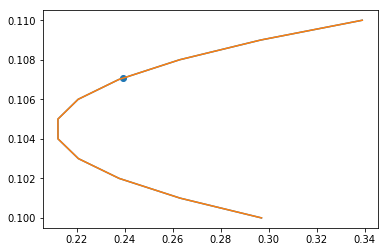

In [297]:
plt.plot(np.array(vol) ** 2, eff)

e = portfolio_efficiency(w_op, actifs[:,0])
v = portfolio_volatility(w_op, actifs[:,1], cov)

plt.scatter(v ** 2, e)

plt.show()

In [298]:
q = 15.0

from cvxopt import matrix, solvers
Q = matrix([[cov[0,0],  1.0 + cov[0,1] / 2],
            [1.0 + cov[0,1] / 2, cov[1,1]]])

p = matrix([-q * actifs[0,0], -q * actifs[1,0]])

G = matrix([[-1.0,0.0],[0.0,-1.0]])
h = matrix([0., 0.])

A = matrix([1.0, 1.0], (1,2))
b = matrix(1.0)

sol = solvers.qp(Q, p, G, h, A, b)
print(sol['x'])

w_op = np.array(sol['x'])
w_op = w_op.reshape((2,))

     pcost       dcost       gap    pres   dres
 0: -1.1806e+00 -2.2914e+00  1e+00  0e+00  1e+00
 1: -1.2414e+00 -1.3473e+00  1e-01  1e-16  1e-01
 2: -1.1955e+00 -1.3142e+00  1e-01  2e-16  3e-17
Terminated (singular KKT matrix).
[ 2.92e-01]
[ 7.08e-01]



In [299]:
w_op

array([ 0.29244421,  0.70755579])

In [233]:
actifs = np.array([[0.10, 0.297],
                   [0.11, 0.339],
                   [0.09, 0.489]])

cov = np.array([[math.sqrt(0.297), 0.335,            0.346],
                [0.335,            math.sqrt(0.339), 0.259],
                [0.346,            0.259,            math.sqrt(0.389)]])

In [234]:
vol = []    
eff = []

for i in range(0, 101):
    for j in range(0, 101 - i):
        ii = round(i/100., 2)
        jj = round(j/100., 2)
        kk = round(1. - ii - jj, 2)        
        vol.append(portfolio_volatility(np.array([ii, jj, kk]), actifs[:,1] ,cov))

for i in range(0, 101):
    for j in range(0, 101 - i):
        ii = round(i/100., 2)
        ji = round(j/100., 2)
        kk = round(1. - ii - jj, 2)
        eff.append(portfolio_efficiency(np.array([ii, jj, kk]), actifs[:,0]))

        
        
        
for i in range(0, 101):
    for j in range(0, 101 - i):
        ii = round(i/100., 2)
        kk = round(j/100., 2)
        jj = round(1. - ii - jj, 2)        
        vol.append(portfolio_volatility(np.array([ii, jj, kk]), actifs[:,1] ,cov))

for i in range(0, 101):
    for j in range(0, 101 - i):
        ii = round(i/100., 2)
        kk = round(j/100., 2)
        jj = round(1. - ii - jj, 2)
        eff.append(portfolio_efficiency(np.array([ii, jj, kk]), actifs[:,0]))
        
        
for i in range(0, 101):
    for j in range(0, 101 - i):
        kk = round(i/100., 2)
        ii = round(j/100., 2)
        jj = round(1. - ii - jj, 2)        
        vol.append(portfolio_volatility(np.array([ii, jj, kk]), actifs[:,1] ,cov))

for i in range(0, 101):
    for j in range(0, 101 - i):
        kk = round(i/100., 2)
        ii = round(j/100., 2)
        jj = round(1. - ii - jj, 2)
        eff.append(portfolio_efficiency(np.array([ii, jj, kk]), actifs[:,0]))    

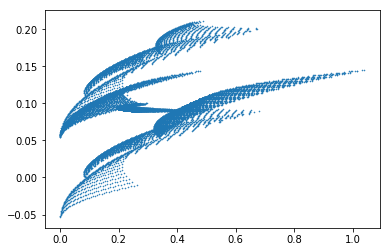

In [235]:
plt.scatter(np.array(vol) ** 2, eff, s=0.3)

plt.show()

In [285]:
q = 0

from cvxopt import matrix, solvers
Q = matrix([[      cov[0,0],        1.0 + cov[0,1] / 2,    1.0 + cov[0,2] / 2],
            [1.0 + cov[1,0] / 2,          cov[1,1],        1.0 + cov[1,2] / 2],
            [1.0 + cov[2,0] / 2,    1.0 + cov[2,1] / 2,          cov[2,2]]])

p = matrix([-q * actifs[0,0], -q * actifs[1,0],  -q * actifs[2,0]])

G = matrix([[-1.0, 0., 0., 1., 0., 0.],
            [0., -1.0, 0., 0., 1., 0.],
            [0., 0., -1., 0., 0., 1.]])

print(G)

h = matrix([0.1, 0.1, 0.1,
            0.4, 0.4, 0.4])

A = matrix([[1.0, 1.0, 1.0]], (1,3))
b = matrix(1.0)

sol = solvers.qp(Q, p, G, h, A, b)
print(sol['x'])

w_op = np.array(sol['x'])
w_op = w_op.reshape((3,))

[-1.00e+00  0.00e+00  0.00e+00]
[ 0.00e+00 -1.00e+00  0.00e+00]
[ 0.00e+00  0.00e+00 -1.00e+00]
[ 1.00e+00  0.00e+00  0.00e+00]
[ 0.00e+00  1.00e+00  0.00e+00]
[ 0.00e+00  0.00e+00  1.00e+00]

     pcost       dcost       gap    pres   dres
 0:  4.8271e-01 -1.0964e+00  2e+00  1e-16  2e-16
 1:  4.8269e-01  4.5350e-01  3e-02  2e-16  1e-16
Terminated (singular KKT matrix).
[ 3.37e-01]
[ 3.38e-01]
[ 3.25e-01]



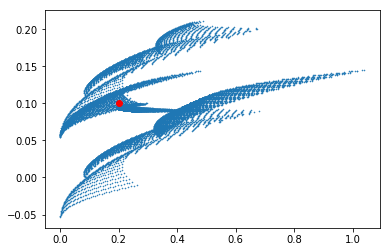

In [243]:
plt.scatter(np.array(vol) ** 2, eff, s=0.3)

e = portfolio_efficiency(w_op, actifs[:,0])
v = portfolio_volatility(w_op, actifs[:,1], cov)

plt.scatter(v ** 2, e, c='r')

plt.show()

In [244]:
w_op

array([ 0.33659556,  0.33797463,  0.32542981])

In [305]:
approx_weight(cov, actifs[:,0], 10, 0., 1.)

     pcost       dcost       gap    pres   dres
 0: -6.2011e-01 -2.6750e+00  2e+00  2e-16  2e-16
 1: -6.2479e-01 -7.1371e-01  9e-02  1e-16  2e-16
Terminated (singular KKT matrix).


array([ 0.43670737,  0.56329263])

In [301]:
def approx_weight(cov, R, q, l=0.01, h=0.1):
    
    Q_ = (cov + 2 - 2 * np.eye(cov.shape[0])) / 2 + (cov * np.eye(cov.shape[0])) / 2
    Q = matrix(Q_)
    
    p = matrix(-q * R)
    
    a1 = -np.eye(cov.shape[0])
    b1 =  np.eye(cov.shape[0])
    
    G = matrix(np.concatenate((a1, b1), axis=0))
    
    h = matrix([l] * cov.shape[0] + [h] * cov.shape[0])
    A = matrix([[1.0] * cov.shape[0]], (1,cov.shape[0]))
    b = matrix(1.0)
    
    sol = solvers.qp(Q, p, G, h, A, b)

    w_op = np.array(sol['x'])
    w_op = w_op.reshape((cov.shape[0],))
    
    return w_op

In [251]:
a = -np.eye(cov.shape[0])
b =  np.eye(cov.shape[0])

In [253]:
np.concatenate((a, b), axis=1)

array([[-1., -0., -0.,  1.,  0.,  0.],
       [-0., -1., -0.,  0.,  1.,  0.],
       [-0., -0., -1.,  0.,  0.,  1.]])

In [268]:
test = np.arange(1,10).reshape((3,3)).astype(float)

In [269]:
test

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.]])

In [271]:
(test + 2 - 2 * np.eye(3)) / 2 + (test * np.eye(3)) / 2

array([[ 1. ,  2. ,  2.5],
       [ 3. ,  5. ,  4. ],
       [ 4.5,  5. ,  9. ]])